In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
import requests
import json

In [131]:
# Reading the csv file into a pandas DataFrame

csvdata = pd.read_csv('Resources/water_potability.csv')
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [132]:
# Remove the NaN values
csvdata = csvdata.dropna()
csvdata.head()

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.37,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.10,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.31,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.07,28749.71654,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.36,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [133]:
# Remove the NaN values
csvdata = csvdata.dropna()

# change columns to int64
csvdata = csvdata.astype({"Ph": "int64"})
csvdata = csvdata.astype({"Hardness": "int64"})
csvdata = csvdata.astype({"Solids": "int64"})
csvdata = csvdata.astype({"Chloramines": "int64"})
csvdata = csvdata.astype({"Sulfate": "int64"})
csvdata = csvdata.astype({"Conductivity": "int64"})
csvdata = csvdata.astype({"Organic_carbon": "int64"})
csvdata = csvdata.astype({"Trihalomethanes": "int64"})
csvdata = csvdata.astype({"Turbidity": "int64"})
csvdata = csvdata.astype({"Potability":"str"})



csvdata.head()

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8,214,22018,8,356,363,18,100,4,0
4,9,181,17978,6,310,398,11,31,4,0
5,5,188,28748,7,326,280,8,54,2,0
6,10,248,28749,7,393,283,13,84,2,0
7,8,203,13672,4,303,474,12,62,4,0


In [134]:
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ph               2011 non-null   int64 
 1   Hardness         2011 non-null   int64 
 2   Solids           2011 non-null   int64 
 3   Chloramines      2011 non-null   int64 
 4   Sulfate          2011 non-null   int64 
 5   Conductivity     2011 non-null   int64 
 6   Organic_carbon   2011 non-null   int64 
 7   Trihalomethanes  2011 non-null   int64 
 8   Turbidity        2011 non-null   int64 
 9   Potability       2011 non-null   object
dtypes: int64(9), object(1)
memory usage: 172.8+ KB


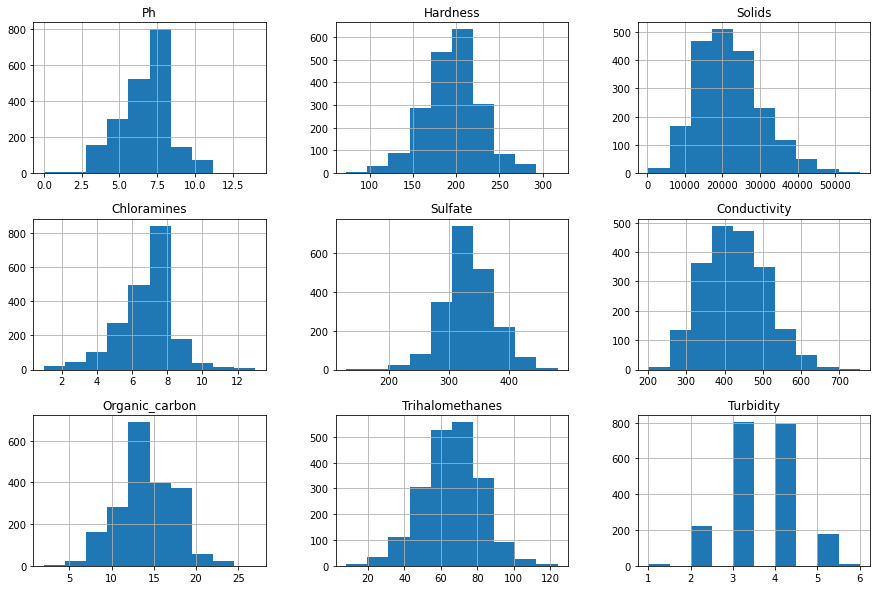

<Figure size 432x288 with 0 Axes>

In [135]:
csvdata.hist(figsize=(15,10))
plt.figure()
plt.show()

In [91]:
#print(csvdata.corr())

<AxesSubplot:>

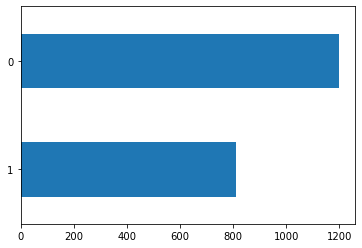

In [136]:
csvdata.Potability.value_counts().sort_values().plot(kind = 'barh')

In [137]:
csvdata['Potability'] = csvdata['Potability'].replace(['1'],'Potable')
csvdata['Potability'] = csvdata['Potability'].replace(['0'],'Not Potable')
csvdata.head()

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8,214,22018,8,356,363,18,100,4,Not Potable
4,9,181,17978,6,310,398,11,31,4,Not Potable
5,5,188,28748,7,326,280,8,54,2,Not Potable
6,10,248,28749,7,393,283,13,84,2,Not Potable
7,8,203,13672,4,303,474,12,62,4,Not Potable


In [138]:
# Assign X (data) and y (target)
X = csvdata.drop("Potability", axis=1)
y = csvdata["Potability"]
print(X.shape, y.shape)

(2011, 9) (2011,)


In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [140]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [141]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [142]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6047745358090185
Testing Data Score: 0.5825049701789264


In [143]:
predictions = classifier.predict(X_test)
print(f"First 20 Predictions:   {predictions[:20]}")
print(f"First 20 Actual labels: {y_test[:20].tolist()}")

First 20 Predictions:   ['Not Potable' 'Not Potable' 'Not Potable' 'Not Potable' 'Not Potable'
 'Not Potable' 'Not Potable' 'Not Potable' 'Not Potable' 'Not Potable'
 'Not Potable' 'Not Potable' 'Not Potable' 'Not Potable' 'Not Potable'
 'Not Potable' 'Not Potable' 'Not Potable' 'Not Potable' 'Not Potable']
First 20 Actual labels: ['Potable', 'Potable', 'Not Potable', 'Not Potable', 'Not Potable', 'Not Potable', 'Potable', 'Potable', 'Potable', 'Potable', 'Potable', 'Potable', 'Not Potable', 'Not Potable', 'Not Potable', 'Not Potable', 'Potable', 'Not Potable', 'Not Potable', 'Potable']


In [144]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Not Potable,Potable
1,Not Potable,Potable
2,Not Potable,Not Potable
3,Not Potable,Not Potable
4,Not Potable,Not Potable
...,...,...
498,Not Potable,Potable
499,Not Potable,Not Potable
500,Not Potable,Not Potable
501,Not Potable,Potable


In [145]:
# Save the model as "Waterquality.pkl"

pickle.dump(classifier, open('Water_Pot.pkl','wb'))

In [ ]:
csvdata.to_csv("water_pot2.csv")